In [1]:
from google.colab import files
files.upload() # kaggle.jsonをアップロード
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


  0% 0.00/19.2k [00:00<?, ?B/s]
100% 19.2k/19.2k [00:00<00:00, 31.9MB/s]
Archive:  time-series-datasets.zip
  inflating: Electric_Production.csv  
  inflating: daily-minimum-temperatures-in-me.csv  
  inflating: monthly-beer-production-in-austr.csv  
  inflating: sales-of-shampoo-over-a-three-ye.csv  
3650
3647
3647
Date
1981-01-01   NaN
1981-01-02   NaN
1981-01-03   NaN
1981-01-04   NaN
1981-01-05   NaN
              ..
1990-12-27   NaN
1990-12-28   NaN
1990-12-29   NaN
1990-12-30   NaN
1990-12-31   NaN
Name: Daily minimum temperatures, Length: 3647, dtype: float64
Date
1981-01-01   NaN
1981-01-02   NaN
1981-01-03   NaN
1981-01-04   NaN
1981-01-05   NaN
              ..
1990-12-27   NaN
1990-12-28   NaN
1990-12-29   NaN
1990-12-30   NaN
1990-12-31   NaN
Name: Daily minimum temperatures, Length: 3647, dtype: float64
Date
1981-01-01   NaN
1981-01-02   NaN
1981-01-03   NaN
1981-01-04   NaN
1981-01-05   NaN
              ..
1990-12-27   NaN
1990-12-28   NaN
1990-12-29   NaN
1990-12-30   N

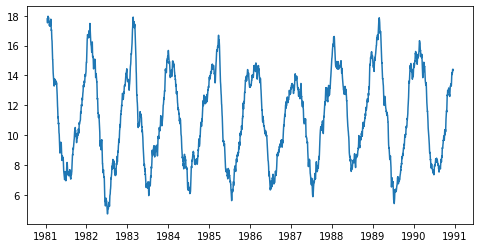

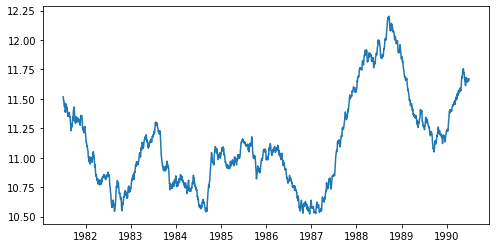

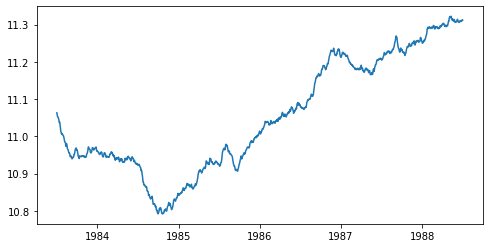

In [7]:
import sys
import numpy as np
import pandas as pd
# 可視化用にインポート
import matplotlib.pyplot as plt
%matplotlib inline
# データの準備
def prepare():
    !kaggle datasets download -d shenba/time-series-datasets
    !unzip time-series-datasets.zip 
    data = pd.read_csv('daily-minimum-temperatures-in-me.csv')
    print(len(data))
    # 欠損値（異常値には'?'が含まれる）を除外
    data = data[~data['Daily minimum temperatures' \
                                ].str.contains('\?')]
    print(len(data))
    features = []
    for f in data.columns.values:
        if f != 'Date':
            features.append(f)
    # 日付の文字列をdatetime型に変換する
    data['Date'] = pd.to_datetime(data['Date'])
    return data, features


def main():
    df, features = prepare()
    print(len(df))
    s = df['Daily minimum temperatures']
    # インデックスに日付の項目を指定
    s.index = df['Date']
    # 1か月，1年, 5年単位での平均気温を表示
    # Windowの中心に平均値を格納( center=True)
    for span in [30, 365, 1825]:
        print( s.rolling( span, center=True ).mean() )
        rol = s.rolling( span, center=True ).mean()
        # 計算結果の入っていない行を削除
        rol = rol.dropna()
        plt.figure(figsize=(8, 4))
        plt.plot(rol)
        plt.savefig('{}.png'.format(span), dpi=500)
        # 算出した結果をCSVファイルに出力
        rol.to_csv('./avg_%d.txt' % span)

if __name__ == '__main__':
    main()